In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
stations_cleaned = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Dock station data/stations_cleaned.csv')
#             delim_whitespace = True)


/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# weather data
weather = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/weather_output')

In [8]:
# cluster data
cluster = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/kmeans_output')

<AxesSubplot:xlabel='cluster'>

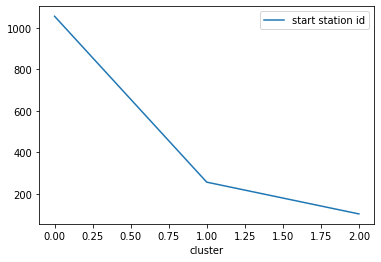

In [9]:
cluster.groupby('cluster')[['start station id']].count().plot()

In [27]:
cluster.head()

,Unnamed: 0,start station name,cluster,start station id
0,0,St James Pl & Oliver St,1,308
1,1,E 19 St & 3 Ave,2,325
2,2,University Pl & E 8 St,1,3244
3,3,W 20 St & 11 Ave,2,459
4,4,E 4 St & 2 Ave,2,439


In [10]:
# dock station data adjustment
dock = stations_cleaned.copy()
# dock.hour = dock.hour.astype(str).apply(lambda x: x.zfill(2))
# dock.loc[dock['hour'] == '24', 'hour'] = '00'
# dock.minute = dock.minute.astype(str).apply(lambda x: x.zfill(2))
# dock['time'] = dock.hour + ':' + dock.minute + ':' +  '00'
# dock['datetime'] = pd.to_datetime(dock['date'] + ' ' + dock['time'])
# dock = dock.drop(['date', 'hour', 'minute', 'time'], axis = 1)
dock.head()

,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,dock_status,time,dayofweek,dayofweek2,season
0,72,W 52 St & 11 Ave,2015-03-01,1,6,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:6,6,Sunday,spring
1,72,W 52 St & 11 Ave,2015-03-01,1,16,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:16,6,Sunday,spring
2,72,W 52 St & 11 Ave,2015-03-01,1,25,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:25,6,Sunday,spring
3,72,W 52 St & 11 Ave,2015-03-01,1,35,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:35,6,Sunday,spring
4,72,W 52 St & 11 Ave,2015-03-01,1,45,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:45,6,Sunday,spring


In [11]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [12]:
weather.describe()

,Unnamed: 0,SOURCE,LATITUDE,LONGITUDE,ELEVATION,TMP,wind_speed,precipitation,month,hour
count,109773.000000,109773.000000,109773.000000,109773.000000,1.097730e+05,109773.000000,109773.000000,109773.000000,109773.000000,109773.000000
mean,54886.000000,6.320744,40.779321,-73.880177,3.400000e+00,13.209761,72.176474,0.383825,6.450275,11.114190
std,31688.879887,1.213964,0.000120,0.000175,8.881825e-16,9.985441,365.930607,2.328188,3.443827,6.913367
min,0.000000,4.000000,40.779200,-73.880350,3.400000e+00,-17.200000,0.000000,0.000000,1.000000,0.000000
25%,27443.000000,6.000000,40.779200,-73.880350,3.400000e+00,5.000000,6.975000,0.000000,3.000000,5.000000
50%,54886.000000,7.000000,40.779440,-73.880350,3.400000e+00,13.300000,10.350000,0.000000,6.000000,11.000000
75%,82329.000000,7.000000,40.779440,-73.880000,3.400000e+00,21.700000,13.950000,0.000000,9.000000,17.000000
max,109772.000000,7.000000,40.779440,-73.880000,3.400000e+00,37.800000,2249.775000,166.100000,12.000000,23.000000


In [24]:
# weather data 
weather_subset = weather[['TMP', 'date', 'hour']]
weather_subset = weather_subset.groupby(['date', 'hour']).mean()
weather_subset.rename(columns = {'TMP':'TMP_mean'}, inplace = True)
weather_subset = weather_subset.reset_index()
weather_subset

,date,hour,TMP_mean
0,2013-01-01,0,3.600000
1,2013-01-01,1,3.900000
2,2013-01-01,2,4.400000
3,2013-01-01,3,4.400000
4,2013-01-01,4,1.666667
...,...,...,...
69603,2020-12-10,3,3.900000
69604,2020-12-10,4,2.200000
69605,2020-12-10,5,3.900000
69606,2020-12-10,6,4.400000


In [45]:
# adding features, making target and input data
# target = dock.dock_status
# target = target.replace(['Empty Alert', 'Healthy', 'Full Alert'], [0, 1, 2])
# logit_input = dock[['in_service', 'avail_bikes', 'avail_docks', 'dayofweek', 'season', 'datetime']]
# logit_input = pd.get_dummies(logit_input, columns = ['season'], drop_first = True)
# logit_input['month'] = logit_input.datetime.dt.month
# logit_input['hour'] = logit_input.datetime.dt.hour
# logit_input['peak'] = [1 if hr > 5 and hr < 20 else 0 for hr in logit_input['hour']]
# logit_input = logit_input.drop('datetime', axis = 1)

In [30]:
# adding features, making target and input data
target = dock.dock_status
# target = target.replace(['Empty Alert', 'Healthy', 'Full Alert'], [0, 1, 2])

# logit_input = pd.get_dummies(logit_input, columns = ['season'], drop_first = True)
# logit_input['peak'] = [1 if hr > 5 and hr < 20 else 0 for hr in logit_input['hour']]
# logit_input = logit_input.drop('datetime', axis = 1)

In [43]:
logit_input = dock[['date','dock_id', 'hour', 'dayofweek2','dock_status']]
logit_input = pd.merge(logit_input, weather_subset, 
                        left_on = ['date', 'hour'], 
                        right_on = ['date', 'hour'], 
                        how = 'inner')
logit_input = pd.merge(logit_input, cluster, 
                        left_on = ['dock_id'], 
                        right_on = ['start station id'], 
                        how = 'inner')
features = logit_input[['dock_id', 'hour', 'dayofweek2', 'TMP_mean', 'cluster']]
features = pd.get_dummies(features, columns = ['dayofweek2'])
target = logit_input['dock_status']

In [44]:
# model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 

logit = LogisticRegression(multi_class='ovr', solver='liblinear')
params = {'C':np.logspace(-4,4, 20)}
gs_logit = GridSearchCV(logit, params, cv=3, iid=True)

In [45]:
features.head()

,dock_id,hour,TMP_mean,cluster,dayofweek2_Friday,dayofweek2_Monday,dayofweek2_Saturday,dayofweek2_Sunday,dayofweek2_Thursday,dayofweek2_Tuesday,dayofweek2_Wednesday
0,72,1,-2.8,1,0,0,0,1,0,0,0
1,72,1,-2.8,1,0,0,0,1,0,0,0
2,72,1,-2.8,1,0,0,0,1,0,0,0
3,72,1,-2.8,1,0,0,0,1,0,0,0
4,72,1,-2.8,1,0,0,0,1,0,0,0


In [46]:
logistic = LogisticRegression(C=1e4, solver='liblinear', multi_class='auto')
logistic.fit(features, target)
logistic.score(features, target)

0.49439805212207844

In [47]:
gs_logit.fit(features, target)

KeyboardInterrupt: 

In [ ]:
gs_logit.best_params_

In [ ]:
gs_logit.best_score_

In [ ]:
gs_logit.best_estimator_.score(features, target)

In [ ]:
cm = confusion_matrix(target, gs_logit.best_estimator_.predict(features))
cm

In [ ]:
## The accuracy against each rating class 0, 1, 2
np.diag(cm/cm.sum(axis=1).reshape((-1,1)))

In [ ]:
gs_logit.best_estimator_.coef_